# <center>Capstone Project - What's The Food<center>

### Import Libraries

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import tensorflow_hub as hub
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image, ImageFile, UnidentifiedImageError
# !pip install bing_image_downloader
from bing_image_downloader import downloader
from pathlib import Path
ImageFile.LOAD_TRUNCATED_IMAGES = True

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Get the Datasets from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!rm -rf '/food_images'

In [5]:
!unzip '/content/drive/MyDrive/food_images.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/food_images/train/burger/burger_train (93).jpg  
  inflating: /content/food_images/train/burger/burger_train (94).jpg  
  inflating: /content/food_images/train/burger/burger_train (96).jpg  
  inflating: /content/food_images/train/burger/burger_train (97).jpg  
  inflating: /content/food_images/train/burger/burger_train (98).jpg  
  inflating: /content/food_images/train/burger/burger_train (99).jpg  
   creating: /content/food_images/train/capcay/
  inflating: /content/food_images/train/capcay/capcay_train (1).jpe  
  inflating: /content/food_images/train/capcay/capcay_train (1).jpeg  
  inflating: /content/food_images/train/capcay/capcay_train (1).jpg  
  inflating: /content/food_images/train/capcay/capcay_train (1).webp  
  inflating: /content/food_images/train/capcay/capcay_train (10).jpeg  
  inflating: /content/food_images/train/capcay/capcay_train (10).jpg  
  inflating: /content/food_images/train/capcay/cap

### Training Directory

In [6]:
train_dir = 'food_images/train'

train_dir_ayam = os.path.join(train_dir, 'ayam_goreng')
train_dir_bakso = os.path.join(train_dir, 'bakso')
train_dir_batagor = os.path.join(train_dir, 'batagor')
train_dir_bubur = os.path.join(train_dir, 'bubur')
train_dir_burger = os.path.join(train_dir, 'burger')
train_dir_capcay = os.path.join(train_dir, 'capcay')
train_dir_crepes = os.path.join(train_dir, 'crepes')
train_dir_cumi = os.path.join(train_dir, 'cumi_goreng_tepung')
train_dir_fu_yung_hai = os.path.join(train_dir, 'fu_yung_hai')
train_dir_gado_gado = os.path.join(train_dir, 'gado_gado')
train_dir_gudeg = os.path.join(train_dir, 'gudeg')
train_dir_ikan = os.path.join(train_dir, 'ikan_bakar')
train_dir_kebab = os.path.join(train_dir, 'kebab')
train_dir_rendang = os.path.join(train_dir, 'rendang')
train_dir_sate = os.path.join(train_dir, 'sate')

### Testing Directory

In [7]:
test_dir = 'food_images/test'

test_dir_ayam = os.path.join(test_dir, 'ayam_goreng')
test_dir_bakso = os.path.join(test_dir, 'bakso')
test_dir_batagor = os.path.join(test_dir, 'batagor')
test_dir_bubur = os.path.join(test_dir, 'bubur')
test_dir_burger = os.path.join(test_dir, 'burger')
test_dir_capcay = os.path.join(test_dir, 'capcay')
test_dir_crepes = os.path.join(test_dir, 'crepes')
test_dir_cumi = os.path.join(test_dir, 'cumi_goreng_tepung')
test_dir_fu_yung_hai = os.path.join(test_dir, 'fu_yung_hai')
test_dir_gado_gado = os.path.join(test_dir, 'gado_gado')
test_dir_gudeg = os.path.join(test_dir, 'gudeg')
test_dir_ikan = os.path.join(test_dir, 'ikan_bakar')
test_dir_kebab = os.path.join(test_dir, 'kebab')
test_dir_rendang = os.path.join(test_dir, 'rendang')
test_dir_sate = os.path.join(test_dir, 'sate')

### Number of Images for Each Train and Test Class

In [8]:
print('\nTotal training ayam goreng images:', len(os.listdir(train_dir_ayam)))
print('Total validation ayam goreng images:', len(os.listdir(test_dir_ayam)))

print('\nTotal training bakso images:', len(os.listdir(train_dir_bakso)))
print('Total validation bakso images:', len(os.listdir(test_dir_bakso)))

print('\nTotal training batagor images:', len(os.listdir(train_dir_batagor)))
print('Total validation batagor images:', len(os.listdir(test_dir_batagor)))

print('\nTotal training bubur images:', len(os.listdir(train_dir_bubur)))
print('Total validation bubur images:', len(os.listdir(test_dir_bubur)))

print('\nTotal training burger images:', len(os.listdir(train_dir_burger)))
print('Total validation burger images:', len(os.listdir(test_dir_burger)))

print('\nTotal training capcay images:', len(os.listdir(train_dir_capcay)))
print('Total validation capcay images:', len(os.listdir(test_dir_capcay)))

print('\nTotal training crepes images:', len(os.listdir(train_dir_crepes)))
print('Total validation crepes images:', len(os.listdir(test_dir_crepes)))

print('\nTotal training cumi goreng tepung images:', len(os.listdir(train_dir_cumi)))
print('Total validation cumi goreng tepung images:', len(os.listdir(test_dir_cumi)))

print('\nTotal training fu yung hai images:', len(os.listdir(train_dir_fu_yung_hai)))
print('Total validation fu yung hai images:', len(os.listdir(test_dir_fu_yung_hai)))

print('\nTotal training gado gado images:', len(os.listdir(train_dir_gado_gado)))
print('Total validation gado gado images:', len(os.listdir(test_dir_gado_gado)))

print('\nTotal training gudeg images:', len(os.listdir(train_dir_gudeg)))
print('Total validation gudeg images:', len(os.listdir(test_dir_gudeg)))

print('\nTotal training ikan bakar images:', len(os.listdir(train_dir_ikan)))
print('Total validation ikan bakar images:', len(os.listdir(test_dir_ikan)))

print('\nTotal training kebab images:', len(os.listdir(train_dir_kebab)))
print('Total validation kebab images:', len(os.listdir(test_dir_kebab)))

print('\nTotal training rendang images:', len(os.listdir(train_dir_rendang)))
print('Total validation rendang images:', len(os.listdir(test_dir_rendang)))

print('\nTotal training sate images:', len(os.listdir(train_dir_sate)))
print('Total validation sate images:', len(os.listdir(test_dir_sate)))


Total training ayam goreng images: 500
Total validation ayam goreng images: 200

Total training bakso images: 500
Total validation bakso images: 200

Total training batagor images: 493
Total validation batagor images: 198

Total training bubur images: 499
Total validation bubur images: 200

Total training burger images: 496
Total validation burger images: 199

Total training capcay images: 497
Total validation capcay images: 198

Total training crepes images: 496
Total validation crepes images: 199

Total training cumi goreng tepung images: 500
Total validation cumi goreng tepung images: 200

Total training fu yung hai images: 500
Total validation fu yung hai images: 200

Total training gado gado images: 500
Total validation gado gado images: 200

Total training gudeg images: 500
Total validation gudeg images: 198

Total training ikan bakar images: 498
Total validation ikan bakar images: 200

Total training kebab images: 493
Total validation kebab images: 199

Total training rendang i

### Downloading Extra Datasets

In [ ]:
downloader.download('kebab.jpg', 
                    limit = 39,  
                    output_dir = 'food_images/train/kebab', 
                    adult_filter_off = True, 
                    force_replace = False, 
                    timeout = 60, 
                    verbose = True)

[%] Downloading Images to D:\TC\Jupyter Notebook\Capstone Project\food_images\train\kebab\kebab.jpg


[!!]Indexing page: 1

[%] Indexed 39 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/micronations/images/0/09/Kebab_%26_Chips.jpg/revision/latest/scale-to-width-down/2000?cb=20130226113027
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gourmetkebab.es/wp-content/uploads/2019/09/doner-kebab-shawarma.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/b/doner-kebab-grilled-meat-bread-vegetables-39463283.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Issue getting: https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Error:: HTTP Error 403: Forbidden
[%] Download

[%] File Downloaded !

[%] Downloading Image #24 from http://www.linzwiki.at/w/images/thumb/f/f8/Pizza_Kebab_Baron.jpg/687px-Pizza_Kebab_Baron.jpg
[!] Issue getting: http://www.linzwiki.at/w/images/thumb/f/f8/Pizza_Kebab_Baron.jpg/687px-Pizza_Kebab_Baron.jpg
[!] Error:: timed out
[%] Downloading Image #24 from https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Iskender_kebab.jpg/800px-Iskender_kebab.jpg
[%] File Downloaded !

[%] Downloading Image #25 from https://freepngimg.com/thumb/grocery/56186-3-kebab-free-transparent-image-hq.png
[!] Issue getting: https://freepngimg.com/thumb/grocery/56186-3-kebab-free-transparent-image-hq.png
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #25 from https://thumbs.dreamstime.com/z/delicious-dishes-turkish-cuisine-doner-kebab-rotary-cooked-rotary-cooked-turkish-chicken-doner-kebab-138066693.jpg
[%] File Downloaded !

[%] Downloading Image #2

In [ ]:
downloader.download('kebab.jpg', 
                    limit = 11,  
                    output_dir = 'food_images/test/kebab', 
                    adult_filter_off = True, 
                    force_replace = False, 
                    timeout = 60, 
                    verbose = True)

[%] Downloading Images to D:\TC\Jupyter Notebook\Capstone Project\food_images\test\kebab\kebab.jpg


[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/micronations/images/0/09/Kebab_%26_Chips.jpg/revision/latest/scale-to-width-down/2000?cb=20130226113027
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gourmetkebab.es/wp-content/uploads/2019/09/doner-kebab-shawarma.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/b/doner-kebab-grilled-meat-bread-vegetables-39463283.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Issue getting: https://external-preview.redd.it/dhOW7zxfGVyUwUaEQAp4UJuEF5KU24d1KjjJtaqoYL8.jpg?auto=webp&amp;s=1796795c6f24e9b0f782151b1bd51e9ba8324e34
[!] Error:: HTTP Error 403: Forbidden
[%] Downloadi

### Check the Shape of One of the Image

In [9]:
sample_image  = load_img(f"{os.path.join(train_dir_ayam, os.listdir(train_dir_ayam)[1])}")

sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (1200, 1600, 3)


### Check the Unidentified Image

In [10]:
path = Path("food_images/train").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


In [11]:
path = Path("food_images/test").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


In [ ]:
path = Path("food_images/train").rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
path = Path("food_images/test").rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

# <center>First Test<center>

### Build the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dense(15, activation = 'softmax')  
])

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 82944)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               42467840  
_________________________________________________________________
dense_39 (Dense)             (None, 15)              

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [ ]:
train_dir = 'food_images/train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

test_dir = 'food_images/test'
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

train_generator = training_datagen.flow_from_directory(
   train_dir,
   target_size = (150, 150),
   class_mode = 'categorical',
   batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
   test_dir,
   target_size = (150, 150),
   class_mode='categorical',
   batch_size = 32
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


### Train the Model

In [ ]:
history = model.fit(train_generator, 
                    epochs = 25, 
                    steps_per_epoch = 20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 21s 1s/step - loss: 4.6025 - accuracy: 0.0734 - val_loss: 2.7058 - val_accuracy: 0.0729
Epoch 2/25
20/20 [==============================] - 21s 1s/step - loss: 2.7027 - accuracy: 0.0731 - val_loss: 2.7114 - val_accuracy: 0.0417
Epoch 3/25
20/20 [==============================] - 21s 1s/step - loss: 2.6960 - accuracy: 0.0766 - val_loss: 2.6996 - val_accuracy: 0.1042
Epoch 4/25
20/20 [==============================] - 21s 1s/step - loss: 2.6992 - accuracy: 0.0828 - val_loss: 2.6912 - val_accuracy: 0.1458
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 2.6754 - accuracy: 0.1109 - val_loss: 2.7104 - val_accuracy: 0.0625
Epoch 6/25
20/20 [==============================] - 22s 1s/step - loss: 2.6690 - accuracy: 0.1094 - val_loss: 2.6884 - val_accuracy: 0.1042
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 2.6669 - accuracy: 0.1125 - val_loss: 2.6640 - val_accuracy: 0.1354
Epoch 8/25
20/20 [==

### Evaluate the Model

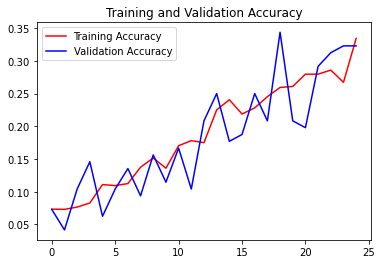

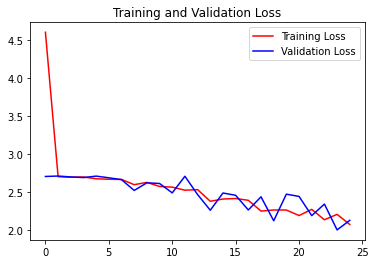

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# <center>Second Test<center>

### Build the Model

In [12]:
ResNet_V2_50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
mobilenet_v2_100 = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_160/classification/5'
import tensorflow_hub as hub

In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_v2_100 (KerasLaye  (None, 1001)             3540265   
 r)                                                              
                                                                 
 flatten_11 (Flatten)        (None, 1001)              0         
                                                                 
 dense_25 (Dense)            (None, 256)               256512    
                                                                 
 dense_26 (Dense)            (None, 15)                3855      
                                                                 
Total params: 3,800,632
Trainable params: 260,367
Non-trainable params: 3,540,265
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'RMsprop', 
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [16]:
TRAINING_DIR = 'food_images/train'
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = 'food_images/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

test_generator = validation_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


### Train the Model

In [ ]:
history = model.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 20, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/20
20/20 [==============================] - 20s 838ms/step - loss: 2.0817 - accuracy: 0.4313 - val_loss: 1.0132 - val_accuracy: 0.6667
Epoch 2/20
20/20 [==============================] - 18s 907ms/step - loss: 1.1994 - accuracy: 0.6328 - val_loss: 0.9629 - val_accuracy: 0.7083
Epoch 3/20
20/20 [==============================] - 14s 715ms/step - loss: 0.9953 - accuracy: 0.6922 - val_loss: 0.7029 - val_accuracy: 0.7917
Epoch 4/20
20/20 [==============================] - 14s 707ms/step - loss: 0.8565 - accuracy: 0.7375 - val_loss: 0.8280 - val_accuracy: 0.7292
Epoch 5/20
20/20 [==============================] - 13s 645ms/step - loss: 0.8580 - accuracy: 0.7469 - val_loss: 0.4815 - val_accuracy: 0.8542
Epoch 6/20
17/20 [========================>.....] - ETA: 1s - loss: 0.7392 - accuracy: 0.7794

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 14s 683ms/step - loss: 0.7384 - accuracy: 0.7812 - val_loss: 0.6473 - val_accuracy: 0.8125
Epoch 7/20
20/20 [==============================] - 14s 704ms/step - loss: 0.7413 - accuracy: 0.7760 - val_loss: 0.6205 - val_accuracy: 0.8021
Epoch 8/20
20/20 [==============================] - 15s 774ms/step - loss: 0.6280 - accuracy: 0.7984 - val_loss: 0.4418 - val_accuracy: 0.8750
Epoch 9/20
20/20 [==============================] - 16s 806ms/step - loss: 0.6976 - accuracy: 0.7844 - val_loss: 0.4233 - val_accuracy: 0.8646
Epoch 10/20
20/20 [==============================] - 13s 680ms/step - loss: 0.6937 - accuracy: 0.8109 - val_loss: 0.5460 - val_accuracy: 0.8229
Epoch 11/20
20/20 [==============================] - 14s 699ms/step - loss: 0.6637 - accuracy: 0.8016 - val_loss: 0.4085 - val_accuracy: 0.8646
Epoch 12/20
20/20 [==============================] - 14s 718ms/step - loss: 0.6489 - accuracy: 0.8047 - val_loss: 0.4055 - val_accuracy: 0.8646
Epoch 1

In [17]:
model2 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model2.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [18]:
model2.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 6, 
                    verbose = 1 
                    # steps_per_epoch = 20, 
                    # validation_steps = 3
           )

Epoch 1/6
142/234 [=================>............] - ETA: 52s - loss: 1.1261 - accuracy: 0.6582

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


234/234 [==============================] - 221s 886ms/step - loss: 1.0068 - accuracy: 0.6935 - val_loss: 0.4474 - val_accuracy: 0.8611
Epoch 2/6
234/234 [==============================] - 197s 843ms/step - loss: 0.5080 - accuracy: 0.8402 - val_loss: 0.3539 - val_accuracy: 0.8912
Epoch 3/6
234/234 [==============================] - 194s 830ms/step - loss: 0.3461 - accuracy: 0.8950 - val_loss: 0.2624 - val_accuracy: 0.9197
Epoch 4/6
234/234 [==============================] - 193s 824ms/step - loss: 0.2584 - accuracy: 0.9159 - val_loss: 0.2380 - val_accuracy: 0.9351
Epoch 5/6
234/234 [==============================] - 195s 832ms/step - loss: 0.1921 - accuracy: 0.9392 - val_loss: 0.2337 - val_accuracy: 0.9378
Epoch 6/6
234/234 [==============================] - 198s 846ms/step - loss: 0.1374 - accuracy: 0.9581 - val_loss: 0.2018 - val_accuracy: 0.9461


# <center>Third Test<center>

In [ ]:
modelx1 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

modelx1.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

historyx1 = modelx1.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 11, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/11
20/20 [==============================] - 18s 727ms/step - loss: 2.3657 - accuracy: 0.2792 - val_loss: 1.4381 - val_accuracy: 0.5833
Epoch 2/11
20/20 [==============================] - 23s 1s/step - loss: 1.5179 - accuracy: 0.5297 - val_loss: 1.1406 - val_accuracy: 0.6875
Epoch 3/11
20/20 [==============================] - 15s 788ms/step - loss: 1.2374 - accuracy: 0.6109 - val_loss: 0.9612 - val_accuracy: 0.7396
Epoch 4/11
20/20 [==============================] - 14s 714ms/step - loss: 1.0726 - accuracy: 0.6641 - val_loss: 0.7113 - val_accuracy: 0.7812
Epoch 5/11
20/20 [==============================] - 15s 792ms/step - loss: 1.0086 - accuracy: 0.6812 - val_loss: 0.8192 - val_accuracy: 0.7188
Epoch 6/11
20/20 [==============================] - 11s 563ms/step - loss: 1.0312 - accuracy: 0.6703 - val_loss: 0.6354 - val_accuracy: 0.8021
Epoch 7/11
20/20 [==============================] - 15s 756ms/step - loss: 0.9604 - accuracy: 0.6969 - val_loss: 0.5969 - val_accuracy: 0.8333
Ep

# <center>Fourth Test<center>

In [ ]:
modelx2 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

modelx2.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

historyx2 = modelx2.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 11, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


Epoch 1/11
20/20 [==============================] - 18s 760ms/step - loss: 2.0902 - accuracy: 0.3625 - val_loss: 1.2368 - val_accuracy: 0.6042
Epoch 2/11
20/20 [==============================] - 13s 687ms/step - loss: 1.2619 - accuracy: 0.6313 - val_loss: 0.8951 - val_accuracy: 0.7292
Epoch 3/11
20/20 [==============================] - 13s 652ms/step - loss: 1.0448 - accuracy: 0.6797 - val_loss: 0.6894 - val_accuracy: 0.7708
Epoch 4/11
20/20 [==============================] - 15s 751ms/step - loss: 0.9490 - accuracy: 0.7234 - val_loss: 0.6818 - val_accuracy: 0.7604
Epoch 5/11
20/20 [==============================] - 14s 678ms/step - loss: 0.8162 - accuracy: 0.7312 - val_loss: 0.5084 - val_accuracy: 0.8333
Epoch 6/11
20/20 [==============================] - 16s 810ms/step - loss: 0.7560 - accuracy: 0.7578 - val_loss: 0.6038 - val_accuracy: 0.8438
Epoch 7/11
20/20 [==============================] - 14s 710ms/step - loss: 0.6466 - accuracy: 0.7875 - val_loss: 0.5908 - val_accuracy: 0.7812

## Saving Model

In [ ]:
model2.save('model2.h5')
modelx1.save('modelx1.h5')
modelx2.save('modelx2.h5')

In [ ]:
from google.colab import files

files.download('model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
files.download('modelx1.h5')
files.download('modelx2.h5')

NameError: ignored

### Download Saved Model

In [ ]:
# model2.save('CapstoneModel90val')

INFO:tensorflow:Assets written to: CapstoneModel90val/assets


INFO:tensorflow:Assets written to: CapstoneModel90val/assets


In [ ]:
# !zip -r /content/capstone.zip /content/CapstoneModel90val

  adding: content/CapstoneModel90val/ (stored 0%)
  adding: content/CapstoneModel90val/assets/ (stored 0%)
  adding: content/CapstoneModel90val/keras_metadata.pb (deflated 86%)
  adding: content/CapstoneModel90val/saved_model.pb (deflated 92%)
  adding: content/CapstoneModel90val/variables/ (stored 0%)
  adding: content/CapstoneModel90val/variables/variables.index (deflated 78%)
  adding: content/CapstoneModel90val/variables/variables.data-00000-of-00001 (deflated 8%)


In [ ]:
# model2.save('CapstoneModel90val.h5')

In [ ]:
# !zip -r /content/capstoneh5.zip /content/CapstoneModel90valh5

In [ ]:
# from google.colab import files
# files.download("/content/capstone.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <center>Fifth Test<center>

In [ ]:
model3 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model3.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 10, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/10
20/20 [==============================] - 18s 721ms/step - loss: 2.7022 - accuracy: 0.1484 - val_loss: 2.1980 - val_accuracy: 0.3854
Epoch 2/10
20/20 [==============================] - 16s 785ms/step - loss: 2.0227 - accuracy: 0.3297 - val_loss: 1.5149 - val_accuracy: 0.5208
Epoch 3/10
20/20 [==============================] - 16s 795ms/step - loss: 1.6473 - accuracy: 0.4703 - val_loss: 1.2257 - val_accuracy: 0.6042
Epoch 4/10
14/20 [====================>.........] - ETA: 3s - loss: 1.4268 - accuracy: 0.5536

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 16s 768ms/step - loss: 1.4478 - accuracy: 0.5500 - val_loss: 0.9246 - val_accuracy: 0.7083
Epoch 5/10
20/20 [==============================] - 13s 676ms/step - loss: 1.3585 - accuracy: 0.5359 - val_loss: 1.0361 - val_accuracy: 0.7188
Epoch 6/10
20/20 [==============================] - 14s 713ms/step - loss: 1.3128 - accuracy: 0.5734 - val_loss: 0.7415 - val_accuracy: 0.7708
Epoch 7/10
20/20 [==============================] - 14s 665ms/step - loss: 1.0702 - accuracy: 0.6719 - val_loss: 0.9215 - val_accuracy: 0.7188
Epoch 8/10
20/20 [==============================] - 15s 765ms/step - loss: 0.9965 - accuracy: 0.6797 - val_loss: 0.7424 - val_accuracy: 0.7500
Epoch 9/10
20/20 [==============================] - 15s 776ms/step - loss: 1.0299 - accuracy: 0.6781 - val_loss: 0.7514 - val_accuracy: 0.8021
Epoch 10/10
20/20 [==============================] - 14s 699ms/step - loss: 0.8919 - accuracy: 0.7297 - val_loss: 0.6406 - val_accuracy: 0.8021


# <center>Sixth Test<center>

In [ ]:
model4 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model4.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
history4 = model4.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 10, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/10
20/20 [==============================] - 16s 688ms/step - loss: 3.6469 - accuracy: 0.0703 - val_loss: 2.6109 - val_accuracy: 0.1979
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 2.9151 - accuracy: 0.0781

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 15s 741ms/step - loss: 2.9151 - accuracy: 0.0781 - val_loss: 2.4945 - val_accuracy: 0.3125
Epoch 3/10
20/20 [==============================] - 12s 593ms/step - loss: 2.7050 - accuracy: 0.1172 - val_loss: 2.4330 - val_accuracy: 0.3333
Epoch 4/10
20/20 [==============================] - 14s 716ms/step - loss: 2.6033 - accuracy: 0.1500 - val_loss: 2.4063 - val_accuracy: 0.3542
Epoch 5/10
20/20 [==============================] - 13s 627ms/step - loss: 2.4746 - accuracy: 0.1844 - val_loss: 2.2363 - val_accuracy: 0.3750
Epoch 6/10
20/20 [==============================] - 13s 647ms/step - loss: 2.4209 - accuracy: 0.2219 - val_loss: 2.0980 - val_accuracy: 0.4792
Epoch 7/10
20/20 [==============================] - 13s 655ms/step - loss: 2.3549 - accuracy: 0.2609 - val_loss: 2.0294 - val_accuracy: 0.4479
Epoch 8/10
20/20 [==============================] - 14s 690ms/step - loss: 2.2463 - accuracy: 0.2781 - val_loss: 1.7974 - val_accuracy: 0.5417
Epoch 9/10

# <center>Seventh Test<center>

In [ ]:
model5 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model5.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
history5 = model5.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 15, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 17s 685ms/step - loss: 2.7743 - accuracy: 0.1875 - val_loss: 1.6257 - val_accuracy: 0.5521
Epoch 2/15
20/20 [==============================] - 13s 652ms/step - loss: 1.6871 - accuracy: 0.4766 - val_loss: 1.0248 - val_accuracy: 0.7083
Epoch 3/15
20/20 [==============================] - 13s 667ms/step - loss: 1.4258 - accuracy: 0.5734 - val_loss: 0.7466 - val_accuracy: 0.7812
Epoch 4/15
20/20 [==============================] - 15s 786ms/step - loss: 1.2530 - accuracy: 0.5938 - val_loss: 0.8437 - val_accuracy: 0.7604
Epoch 5/15
20/20 [==============================] - 14s 713ms/step - loss: 1.1308 - accuracy: 0.6234 - val_loss: 0.6437 - val_accuracy: 0.8646
Epoch 6/15
20/20 [==============================] - 13s 651ms/step - loss: 1.0781 - accuracy: 0.6500 - val_loss: 0.5845 - val_accuracy: 0.8333
Epoch 7/15
19/20 [===========================>..] - ETA: 0s - loss: 1.0227 - accuracy: 0.6875

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 14s 711ms/step - loss: 1.0199 - accuracy: 0.6844 - val_loss: 0.6531 - val_accuracy: 0.8229
Epoch 8/15
20/20 [==============================] - 16s 823ms/step - loss: 0.9393 - accuracy: 0.7000 - val_loss: 0.6781 - val_accuracy: 0.7812
Epoch 9/15
20/20 [==============================] - 15s 770ms/step - loss: 0.9137 - accuracy: 0.7359 - val_loss: 0.4982 - val_accuracy: 0.8542
Epoch 10/15
20/20 [==============================] - 12s 602ms/step - loss: 0.9035 - accuracy: 0.7219 - val_loss: 0.6093 - val_accuracy: 0.8333
Epoch 11/15
20/20 [==============================] - 12s 595ms/step - loss: 0.8589 - accuracy: 0.7240 - val_loss: 0.8326 - val_accuracy: 0.7500
Epoch 12/15
20/20 [==============================] - 14s 707ms/step - loss: 0.8646 - accuracy: 0.7484 - val_loss: 0.5333 - val_accuracy: 0.8333
Epoch 13/15
20/20 [==============================] - 13s 628ms/step - loss: 0.8169 - accuracy: 0.7516 - val_loss: 0.4670 - val_accuracy: 0.8438
Epoch 

# <center>Eight Test<center>

In [ ]:
model6 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model6.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history6 = model6.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 15, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/15
13/20 [==================>...........] - ETA: 3s - loss: 2.9067 - accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 17s 735ms/step - loss: 2.4479 - accuracy: 0.3297 - val_loss: 0.9900 - val_accuracy: 0.6562
Epoch 2/15
20/20 [==============================] - 11s 582ms/step - loss: 1.4926 - accuracy: 0.5672 - val_loss: 0.8219 - val_accuracy: 0.7812
Epoch 3/15
20/20 [==============================] - 14s 687ms/step - loss: 1.1192 - accuracy: 0.6625 - val_loss: 0.7710 - val_accuracy: 0.7917
Epoch 4/15
20/20 [==============================] - 14s 717ms/step - loss: 0.9249 - accuracy: 0.7031 - val_loss: 0.4428 - val_accuracy: 0.8854
Epoch 5/15
20/20 [==============================] - 14s 726ms/step - loss: 0.9415 - accuracy: 0.7141 - val_loss: 0.5898 - val_accuracy: 0.8333
Epoch 6/15
20/20 [==============================] - 13s 646ms/step - loss: 0.9039 - accuracy: 0.7344 - val_loss: 0.6862 - val_accuracy: 0.7500
Epoch 7/15
20/20 [==============================] - 12s 604ms/step - loss: 0.7704 - accuracy: 0.7594 - val_loss: 0.5690 - val_accuracy: 0.8125
Epoch 8/15

# <center>Ninth Test<center>

In [ ]:
model7 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model7.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history7 = model7.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 15, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/15
10/20 [==============>...............] - ETA: 6s - loss: 2.2938 - accuracy: 0.3219

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 24s 1s/step - loss: 1.7688 - accuracy: 0.4734 - val_loss: 1.1460 - val_accuracy: 0.6354
Epoch 2/15
20/20 [==============================] - 14s 719ms/step - loss: 0.8736 - accuracy: 0.7188 - val_loss: 0.6606 - val_accuracy: 0.7604
Epoch 3/15
20/20 [==============================] - 13s 638ms/step - loss: 0.8989 - accuracy: 0.7156 - val_loss: 0.7566 - val_accuracy: 0.7708
Epoch 4/15
20/20 [==============================] - 14s 733ms/step - loss: 0.7386 - accuracy: 0.7875 - val_loss: 0.5577 - val_accuracy: 0.8229
Epoch 5/15
20/20 [==============================] - 15s 780ms/step - loss: 0.6585 - accuracy: 0.8078 - val_loss: 0.4086 - val_accuracy: 0.8646
Epoch 6/15
20/20 [==============================] - 13s 647ms/step - loss: 0.6446 - accuracy: 0.8000 - val_loss: 0.3680 - val_accuracy: 0.9062
Epoch 7/15
20/20 [==============================] - 15s 731ms/step - loss: 0.6467 - accuracy: 0.8141 - val_loss: 0.6720 - val_accuracy: 0.8125
Epoch 8/15
20

# <center>Tenth Test<center>

In [ ]:
resnetv2_101 = 'https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5'

model8 = tf.keras.models.Sequential([
    hub.KerasLayer(resnetv2_101, trainable = False, input_shape = (160,160,3), name = 'resnetv2_101'),
    # tf.keras.layers.Convolution2D
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model8.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history8 = model8.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 15, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 21s 720ms/step - loss: 3.4394 - accuracy: 0.3219 - val_loss: 1.7596 - val_accuracy: 0.5729
Epoch 2/15
20/20 [==============================] - 18s 870ms/step - loss: 1.8852 - accuracy: 0.5281 - val_loss: 1.5081 - val_accuracy: 0.6042
Epoch 3/15
18/20 [==========================>...] - ETA: 1s - loss: 1.5425 - accuracy: 0.5906

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 17s 868ms/step - loss: 1.5495 - accuracy: 0.5828 - val_loss: 1.0391 - val_accuracy: 0.6875
Epoch 4/15
20/20 [==============================] - 16s 841ms/step - loss: 1.2909 - accuracy: 0.6359 - val_loss: 1.3142 - val_accuracy: 0.5833
Epoch 5/15
20/20 [==============================] - 14s 734ms/step - loss: 1.1396 - accuracy: 0.6591 - val_loss: 1.0065 - val_accuracy: 0.7083
Epoch 6/15
20/20 [==============================] - 14s 720ms/step - loss: 1.1925 - accuracy: 0.6766 - val_loss: 1.1584 - val_accuracy: 0.6667
Epoch 7/15
20/20 [==============================] - 15s 749ms/step - loss: 1.1553 - accuracy: 0.6396 - val_loss: 1.0132 - val_accuracy: 0.7083
Epoch 8/15
20/20 [==============================] - 13s 670ms/step - loss: 1.0487 - accuracy: 0.6781 - val_loss: 0.8588 - val_accuracy: 0.7188
Epoch 9/15
20/20 [==============================] - 16s 789ms/step - loss: 0.9197 - accuracy: 0.7063 - val_loss: 0.8146 - val_accuracy: 0.7500
Epoch 10/1

# <center>Eleventh Test<center>

In [ ]:
model9 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = True, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model9.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history9 = model9.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 15, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 21s 783ms/step - loss: 2.2792 - accuracy: 0.3688 - val_loss: 4.1608 - val_accuracy: 0.2917
Epoch 2/15
20/20 [==============================] - 14s 719ms/step - loss: 1.6213 - accuracy: 0.5672 - val_loss: 4.3505 - val_accuracy: 0.3438
Epoch 3/15
20/20 [==============================] - ETA: 0s - loss: 1.4115 - accuracy: 0.6234

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 15s 737ms/step - loss: 1.4115 - accuracy: 0.6234 - val_loss: 3.7287 - val_accuracy: 0.4271
Epoch 4/15
20/20 [==============================] - 12s 622ms/step - loss: 1.3835 - accuracy: 0.6031 - val_loss: 4.3370 - val_accuracy: 0.4167
Epoch 5/15
20/20 [==============================] - 12s 591ms/step - loss: 1.3630 - accuracy: 0.6500 - val_loss: 2.4221 - val_accuracy: 0.5208
Epoch 6/15
20/20 [==============================] - 14s 708ms/step - loss: 1.4380 - accuracy: 0.6088 - val_loss: 3.5782 - val_accuracy: 0.3646
Epoch 7/15
20/20 [==============================] - 13s 653ms/step - loss: 1.3988 - accuracy: 0.6109 - val_loss: 3.3676 - val_accuracy: 0.4583
Epoch 8/15
20/20 [==============================] - 17s 870ms/step - loss: 1.4895 - accuracy: 0.6250 - val_loss: 2.0667 - val_accuracy: 0.5104
Epoch 9/15
20/20 [==============================] - 14s 687ms/step - loss: 1.3812 - accuracy: 0.6328 - val_loss: 2.4705 - val_accuracy: 0.5000
Epoch 10/1

# <center>Twelfth Test<center>

In [ ]:
model10 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

model10.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

history10 = model10.fit(train_generator, 
                    validation_data = test_generator, 
                    epochs = 15, 
                    verbose = 1, 
                    steps_per_epoch = 20, 
                    validation_steps = 3)

Epoch 1/15
13/20 [==================>...........] - ETA: 3s - loss: 2.1650 - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


20/20 [==============================] - 20s 766ms/step - loss: 2.0111 - accuracy: 0.4062 - val_loss: 9.7500 - val_accuracy: 0.0729
Epoch 2/15
20/20 [==============================] - 14s 702ms/step - loss: 1.4452 - accuracy: 0.5453 - val_loss: 7.6025 - val_accuracy: 0.0938
Epoch 3/15
20/20 [==============================] - 17s 876ms/step - loss: 1.3209 - accuracy: 0.6016 - val_loss: 8.6542 - val_accuracy: 0.0521
Epoch 4/15
20/20 [==============================] - 16s 823ms/step - loss: 1.3156 - accuracy: 0.6016 - val_loss: 6.6515 - val_accuracy: 0.0521
Epoch 5/15
20/20 [==============================] - 13s 630ms/step - loss: 1.1775 - accuracy: 0.6531 - val_loss: 7.4103 - val_accuracy: 0.0729
Epoch 6/15
20/20 [==============================] - 13s 665ms/step - loss: 1.1772 - accuracy: 0.6484 - val_loss: 8.7559 - val_accuracy: 0.0729
Epoch 7/15
20/20 [==============================] - 14s 676ms/step - loss: 1.1571 - accuracy: 0.6516 - val_loss: 8.5523 - val_accuracy: 0.1042
Epoch 8/15

# <center>Thirteenth Test<center>

### Build the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax'), 
])

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)             

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [ ]:
train_dir = 'food_images/train'
training_datagen = ImageDataGenerator(rescale = 1./255)

test_dir = 'food_images/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
   train_dir,
   target_size = (150, 150),
   class_mode = 'categorical',
   batch_size = 32
)

validation_generator = validation_datagen.flow_from_directory(
   test_dir,
   target_size = (150, 150),
   class_mode='categorical',
   batch_size = 32
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


### Train the Model

In [ ]:
history = model.fit(train_generator, 
                    epochs = 25, 
                    steps_per_epoch = 20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 19s 969ms/step - loss: 3.1681 - accuracy: 0.0672 - val_loss: 2.7077 - val_accuracy: 0.0833
Epoch 2/25
20/20 [==============================] - 19s 957ms/step - loss: 2.7055 - accuracy: 0.0812 - val_loss: 2.6616 - val_accuracy: 0.0833
Epoch 3/25
20/20 [==============================] - 19s 927ms/step - loss: 2.6875 - accuracy: 0.1125 - val_loss: 2.6437 - val_accuracy: 0.1146
Epoch 4/25
20/20 [==============================] - 16s 823ms/step - loss: 2.6632 - accuracy: 0.0828 - val_loss: 2.6758 - val_accuracy: 0.0625
Epoch 5/25
20/20 [==============================] - 18s 880ms/step - loss: 2.5855 - accuracy: 0.1375 - val_loss: 2.5762 - val_accuracy: 0.1771
Epoch 6/25
20/20 [==============================] - 20s 1s/step - loss: 2.5408 - accuracy: 0.1734 - val_loss: 2.5820 - val_accuracy: 0.1667
Epoch 7/25
20/20 [==============================] - 17s 867ms/step - loss: 2.4888 - accuracy: 0.1797 - val_loss: 2.4187 - val_accuracy: 0.1771
Ep

### Evaluate the Model

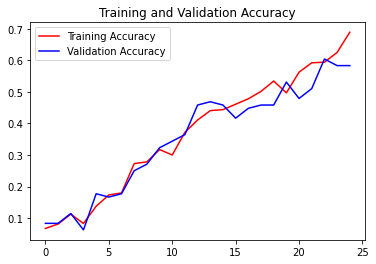

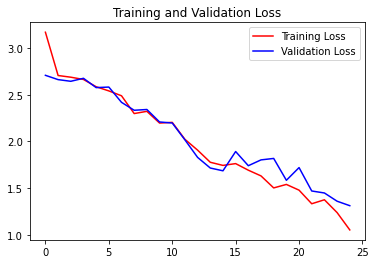

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# <center>Fourteenth Test (Selected Model)<center>

### Transfer Learning

In [ ]:
ResNet_V2_50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'
mobilenet_v2_100 = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_160/classification/5'

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (160, 160, 3),
                                               include_top = False,
                                               weights = 'imagenet')

In [ ]:
model = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160, 160, 3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_v2_100 (KerasLayer (None, 1001)              3540265   
_________________________________________________________________
flatten (Flatten)            (None, 1001)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256512    
_________________________________________________________________
dense_1 (Dense)              (None, 15)                3855      
Total params: 3,800,632
Trainable params: 260,367
Non-trainable params: 3,540,265
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Prepare the ImageDataGenerator

In [ ]:
TRAINING_DIR = 'food_images/train'
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = 'food_images/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

test_generator = training_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (160, 160),
  class_mode = 'categorical',
  batch_size = 32,
)

Found 7464 images belonging to 15 classes.
Found 2988 images belonging to 15 classes.


In [ ]:
history = model.fit(train_generator, 
                      validation_data = test_generator, 
                      epochs = 15, 
                      verbose = 1, 
                      steps_per_epoch = 20, 
                      validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 27s 1s/step - loss: 2.0691 - accuracy: 0.3953 - val_loss: 1.1724 - val_accuracy: 0.6562
Epoch 2/15
20/20 [==============================] - 33s 2s/step - loss: 0.9850 - accuracy: 0.6984 - val_loss: 1.0552 - val_accuracy: 0.6667
Epoch 3/15
20/20 [==============================] - 32s 2s/step - loss: 0.8294 - accuracy: 0.7469 - val_loss: 0.5442 - val_accuracy: 0.8229
Epoch 4/15
20/20 [==============================] - 30s 2s/step - loss: 0.7432 - accuracy: 0.7656 - val_loss: 0.6781 - val_accuracy: 0.7708
Epoch 5/15
20/20 [==============================] - 28s 1s/step - loss: 0.6838 - accuracy: 0.7922 - val_loss: 0.4892 - val_accuracy: 0.8542
Epoch 6/15
20/20 [==============================] - 27s 1s/step - loss: 0.6264 - accuracy: 0.8141 - val_loss: 0.6555 - val_accuracy: 0.8021
Epoch 7/15
20/20 [==============================] - 35s 2s/step - loss: 0.5061 - accuracy: 0.8484 - val_loss: 0.4753 - val_accuracy: 0.8229
Epoch 8/15
20/20 [==

### Build the Model

In [ ]:
model3 = tf.keras.models.Sequential([
    hub.KerasLayer(mobilenet_v2_100, trainable = False, input_shape = (160,160,3), name = 'mobilenet_v2_100'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'softmax')
])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_v2_100 (KerasLayer (None, 1001)              3540265   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               513024    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 15)                3855      
Total params: 4,188,472
Trainable params: 648,207
Non-trainable params: 3,540,265
______________________________________

In [ ]:
model3.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### Train the Model

In [ ]:
history3 = model3.fit(train_generator, 
                      validation_data = test_generator, 
                      epochs = 15, 
                      verbose = 1, 
                      steps_per_epoch = 20, 
                      validation_steps = 3)

Epoch 1/15
20/20 [==============================] - 19s 925ms/step - loss: 1.8421 - accuracy: 0.4359 - val_loss: 1.0285 - val_accuracy: 0.6667
Epoch 2/15
20/20 [==============================] - 22s 1s/step - loss: 1.0840 - accuracy: 0.6703 - val_loss: 0.8180 - val_accuracy: 0.7500
Epoch 3/15
20/20 [==============================] - 17s 855ms/step - loss: 0.8648 - accuracy: 0.7203 - val_loss: 0.8076 - val_accuracy: 0.7812
Epoch 4/15
20/20 [==============================] - 21s 1s/step - loss: 0.7217 - accuracy: 0.7625 - val_loss: 1.1769 - val_accuracy: 0.6250
Epoch 5/15
20/20 [==============================] - 18s 905ms/step - loss: 0.8511 - accuracy: 0.7547 - val_loss: 0.7067 - val_accuracy: 0.7708
Epoch 6/15
20/20 [==============================] - 28s 1s/step - loss: 0.6585 - accuracy: 0.8109 - val_loss: 0.6956 - val_accuracy: 0.7708
Epoch 7/15
20/20 [==============================] - 23s 1s/step - loss: 0.6740 - accuracy: 0.7695 - val_loss: 0.5730 - val_accuracy: 0.8021
Epoch 8/15


### Evaluate the Model

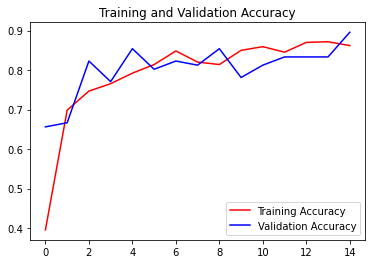

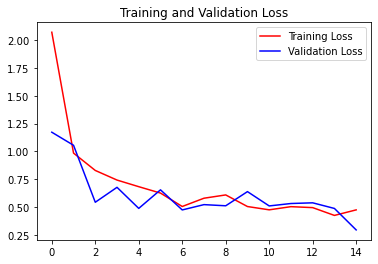

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Save the Model

In [ ]:
model3.save('CapstoneModel90val')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: CapstoneModel90val\assets


INFO:tensorflow:Assets written to: CapstoneModel90val\assets


In [ ]:
!zip -r /content/capstone.zip /content/CapstoneModel90val

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
model3.save('CapstoneModel90val.h5')

In [ ]:
!zip -r /content/capstoneh5.zip /content/CapstoneModel90valh5

'zip' is not recognized as an internal or external command,
operable program or batch file.


# <center>Predicting the Image<center>

In [ ]:
def predictimage(imgpath):
    img_width, img_height = 160, 160
    img = image.load_img(imgpath, target_size = (img_width, img_height))
    x = image.img_to_array(img) 
    x /= 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images)
    #Print(classes)
    print(np.argmax(classes, axis = 1))

In [ ]:
testing = '/content/food_images/train/rendang'

for x in os.listdir(testing):
    filename = os.path.join(testing + '/' + x)
    predictimage(filename)

[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[10]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[13]
[8]
[13]
[13]
[13]
[

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
    #Predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size = (160, 160))

    x = image.img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis = 0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=6)
    print(classes)

    output_class = np.argmax(classes)
    classname = ["ayam_goreng", "bakso", "batagor", "bubur", "burger", "capcay", "crepes", "cumi_goreng_tepung", "fu_yung_hai", "gado_gado", "gudeg", "ikan_bakar", "kebab", "rendang", "sate"]
    print("The predicted class is", classname[output_class])